# Simple Linear Regression - Supervised Model

## Import Library

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Read Dataset

In [42]:
df = pd.read_csv("Advertising.csv")
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


Data consists of 4 columns TV, radio and newspaper are the sources of advertisement and sales  is the corresponding sales amount. We are trying to predict sales from other columns.
In this part we will try simple linear regression.

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [44]:
df.describe() 

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


C:\Users\mehme\anaconda3\lib\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


<AxesSubplot:>

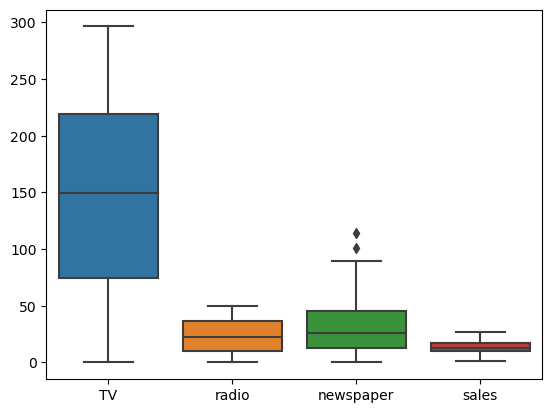

In [45]:
sns.boxplot(data=df)

## Create new independent variable (feature)

In [46]:
df["total_spend"] = df["TV"] + df["radio"] + df["newspaper"]

In [47]:
df

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,55.7
196,94.2,4.9,8.1,9.7,107.2
197,177.0,9.3,6.4,12.8,192.7
198,283.6,42.0,66.2,25.5,391.8


## Which feature is more suitable for linear regression?

In [48]:
df.corr()

,TV,radio,newspaper,sales,total_spend
TV,1.000000,0.054809,0.056648,0.782224,0.945330
radio,0.054809,1.000000,0.354104,0.576223,0.293211
newspaper,0.056648,0.354104,1.000000,0.228299,0.343059
sales,0.782224,0.576223,0.228299,1.000000,0.867712
total_spend,0.945330,0.293211,0.343059,0.867712,1.000000


<AxesSubplot:>

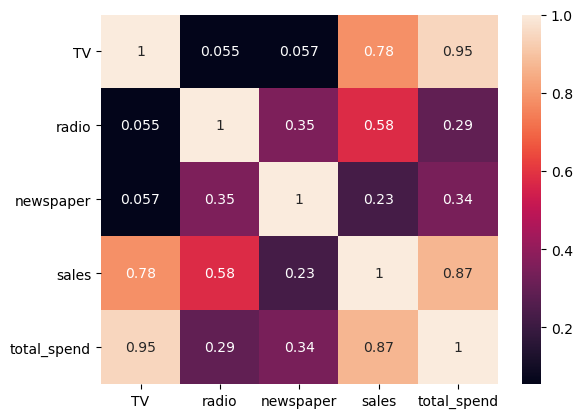

In [49]:
sns.heatmap(data=df.corr(), annot=True)

Total spend is the most correlated feature to the target
so we use total spend for simple linear regression

In [50]:
df = df[["total_spend", "sales"]]
df

,total_spend,sales
0,337.1,22.1
1,128.9,10.4
2,132.4,9.3
3,251.3,18.5
4,250.0,12.9
...,...,...
195,55.7,7.6
196,107.2,9.7
197,192.7,12.8
198,391.8,25.5


<AxesSubplot:xlabel='total_spend', ylabel='sales'>

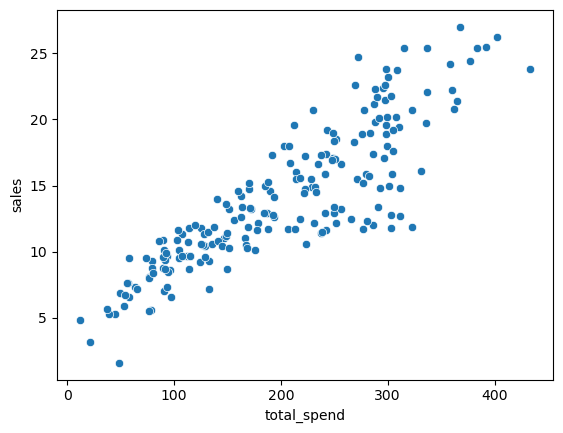

In [51]:
sns.scatterplot(x ="total_spend", y = "sales", data=df)


## Coefficient of determination (R2)

In [56]:
corr=df["sales"].corr(df["total_spend"])
corr

0.8677123027017418

In [57]:
R2_score = corr**2
R2_score

0.7529246402599592

## Linear Regression

<AxesSubplot:xlabel='total_spend', ylabel='sales'>

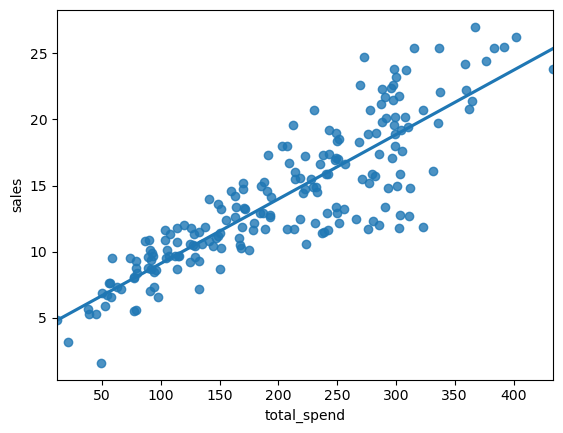

In [58]:
#to see regression line we use regplot of seaborn library
sns.regplot(x="total_spend", y="sales", data=df, ci=None)


## Splitting the dataset into X(independent variables) and y (dependent variable)

y_pred = b1X + b0

In [61]:
X = df["total_spend"]
y = df["sales"]

## Determination of coefficients (slope and intercept)

In [62]:
#We may use numpys polyplot to find correlation coefficients for simple linear regression
np.polyfit(X, y, deg=1)

array([0.04868788, 4.24302822])

In [67]:
b1, b0 = np.polyfit(X, y, deg=1)

# b1 = slope, b0= intercept

In [68]:
print("b1 :", b1)
print("b0 :", b0)

b1 : 0.048687879319048145
b0 : 4.2430282160363255


In [70]:
y_pred = b1*X + b0

In [71]:
values = {"actual": y, "predicted": y_pred, "residual":y-y_pred, "LSE": (y-y_pred)**2, "ABS":abs(y-y_pred)}
df_2 = pd.DataFrame(values)
df_2

,actual,predicted,residual,LSE,ABS
0,22.1,20.655712,1.444288,2.085967,1.444288
1,10.4,10.518896,-0.118896,0.014136,0.118896
2,9.3,10.689303,-1.389303,1.930164,1.389303
3,18.5,16.478292,2.021708,4.087302,2.021708
4,12.9,16.414998,-3.514998,12.355211,3.514998
...,...,...,...,...,...
195,7.6,6.954943,0.645057,0.416098,0.645057
196,9.7,9.462369,0.237631,0.056469,0.237631
197,12.8,13.625183,-0.825183,0.680926,0.825183
198,25.5,23.318939,2.181061,4.757026,2.181061


In [73]:
df_2.residual.sum().round()


0.0